In [1]:
import numpy as np
import pandas as pd

In [2]:
url_inv = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"
url_std = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/272143a7-533e-42a1-b72d-622116474a21/download/service_standards.csv"

In [3]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
df_inv = pd.read_csv(url_inv)

In [5]:
df_inv.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",Provides financial counselling and mediation s...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The use of""NA"" in the SIN column is an indica...",NaN
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding for the development of nation...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding to industry associations and ...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides support for pre-commercialization Res...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides repayable contributions to approved i...,...,0,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN


In [6]:
df_inv.describe()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
count,1865,1865,1865,1865,1865,1865,1865,1865,1865,1865,...,1865,1139,1224,1306,1330,1218,1488,1343,1240,1075
unique,3,1232,1337,1355,67,68,12,74,9,1416,...,265,2,2,2,2,2,2,99,746,648
top,2018-2019,1548,Public Enquiries,Demandes des médias,"Immigration, Refugees and Citizenship Canada","Immigration, Réfugiés et Citoyenneté Canada",extern,reg,non,"The Program makes use of regulatory measures, ...",...,0,Y,N,N,N,N,Y,"tel,onl","The value ""NA"" indicates that applications are...",Ce service n'est pas disponible via d'autres m...
freq,1180,5,9,4,226,226,1461,558,1135,9,...,892,575,691,725,783,723,749,143,37,42


In [7]:
df_inv.columns

Index(['fiscal_yr', 'service_id', 'service_name_en', 'service_name_fr',
       'department_name_en', 'department_name_fr', 'external_internal',
       'service_type', 'special_designations', 'service_description_en',
       'service_description_fr', 'service_url_en', 'service_url_fr',
       'program_name_en', 'program_name_fr', 'last_GBA',
       'client_target_groups', 'info_service', 'service_fee',
       'cra_business_number', 'use_of_sin', 'service_channels',
       'online_applications', 'web_visits_info_service', 'calls_received',
       'in_person_applications', 'postal_mail_applications',
       'other_applications', 'e_registration', 'e_authentication',
       'e_application', 'e_decision', 'e_issuance', 'e_feedback',
       'client_feedback', 'special_remarks_en', 'special_remarks_fr'],
      dtype='object')

# Data Cleanup

## Numeric columns

In [8]:
#Convert object columns to numeric data type.
numeric_columns = ['web_visits_info_service', 'calls_received', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
for col in numeric_columns:
    df_inv[col] = pd.to_numeric(df_inv[col], errors = 'coerce')

In [9]:
#Sum total applications
applications=['online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
df_inv["total_applications"]=df_inv[applications].sum(axis=1)

## External_internal

Much of this is copied from Dia's notebook

In [10]:
df_inv.external_internal.value_counts()

extern                      1461
enterprise                   220
extern,enterprise            136
extern,intern                 18
extern,enterprise,intern       9
enterprise,extern              6
intern                         6
enterprise,intern              5
intern,enterprise,extern       1
enterprise,extern,intern       1
intern,extern                  1
extern,intern,enterprise       1
Name: external_internal, dtype: int64

In [13]:
def translate_to_EI(val):
    if val in ['extern', 'EX']:
        return 'EX'
    elif val in ['enterprise', 'intern', 'enterprise,intern', 'IN']:
        return 'IN'
    else:
        return 'EI'

In [14]:
#df_inv.external_internal
df_inv['external_internal'] = df_inv['external_internal'].map(translate_to_EI)
df_inv.external_internal.value_counts()

EX    1461
IN     231
EI     173
Name: external_internal, dtype: int64

## Use of Social Insurance Number

In [80]:
df_inv.use_of_sin.unique()

array(['ND', 'N', nan, 'Y'], dtype=object)

In [88]:
#Replace 'ND' with nan
df_inv['use_of_sin'] = df_inv.use_of_sin.replace(to_replace = 'ND', value = np.nan)
df_inv.use_of_sin.unique()

array([nan, 'N', 'Y'], dtype=object)

## Department name and Fiscal year

AS observed noted by Dia, data over all three years is only available for 11 departments. We restrict ourselves to these. Furthermore, Danyi's graph shows a significant decrease in the number of applications (online and otherwise) in the fiscale year 2018-2019. This might be due to a lack of data. We will therefore consider exclusing the fiscal year 2018-2019.

For more information, read comments [here](https://open.canada.ca/data/en/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c).

In [89]:
df_inv.fiscal_yr.unique()

array(['2016-2017', '2017-2018', '2018-2019'], dtype=object)

In [90]:
departments = df_inv[df_inv.fiscal_yr == '2016-2017'].department_name_en.unique()
df = df_inv[df_inv.department_name_en.isin(departments)]

In [91]:
df.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr,total_applications
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,EX,res,"prior,crit",Provides financial counselling and mediation s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The use of""NA"" in the SIN column is an indica...",NaN,282.0
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,EX,res,prior,Provides funding for the development of nation...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,16.0
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,EX,res,prior,Provides funding to industry associations and ...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,141.0
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,EX,res,prior,Provides support for pre-commercialization Res...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,29.0
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,EX,res,prior,Provides repayable contributions to approved i...,...,NaN,NaN,Y,Y,N,N,NaN,NaN,NaN,36.0


## Selecting relevant columns

We begin by redefining df to only contain the columns that will be of interest to us.


In [92]:
rel_cols = ['fiscal_yr', 'service_name_en', 'department_name_en', 'external_internal',
            'service_type', 'client_target_groups', 'service_fee','use_of_sin', 
            'online_applications', 'web_visits_info_service', 'calls_received',
            'in_person_applications', 'postal_mail_applications', 'other_applications', 'total_applications',
            'e_registration', 'e_authentication', 'e_application', 'e_decision', 'e_issuance', 'e_feedback']
df = df[rel_cols]
df.head()

,fiscal_yr,service_name_en,department_name_en,external_internal,service_type,client_target_groups,service_fee,use_of_sin,online_applications,web_visits_info_service,...,in_person_applications,postal_mail_applications,other_applications,total_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback
0,2016-2017,Farm Debt Mediation Service,Agriculture and Agri-Food Canada,EX,res,econom,N,NaN,282.0,0.0,...,0.0,0.0,0.0,282.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-2017,AgriMarketing Program Assurance Systems,Agriculture and Agri-Food Canada,EX,res,econom,N,NaN,16.0,0.0,...,0.0,0.0,0.0,16.0,NaN,NaN,Y,Y,N,N
2,2016-2017,AgriMarketing Program Market Development,Agriculture and Agri-Food Canada,EX,res,econom,N,NaN,141.0,0.0,...,0.0,0.0,0.0,141.0,NaN,NaN,Y,Y,N,N
3,2016-2017,AgriInnovation Program Industry-led Research a...,Agriculture and Agri-Food Canada,EX,res,NGO,N,NaN,29.0,0.0,...,0.0,0.0,0.0,29.0,NaN,NaN,Y,Y,N,N
4,2016-2017,AgriInnovation Program Enabling Commercializat...,Agriculture and Agri-Food Canada,EX,res,econom,N,NaN,36.0,0.0,...,0.0,0.0,0.0,36.0,NaN,NaN,Y,Y,N,N


# Data Plotting and Preliminary Exploration

## Web visits and applications

In [93]:
#Selecting important columns
df_web = df[['fiscal_yr', 'department_name_en', 'web_visits_info_service', 'online_applications', 'total_applications']]

#Remove rows where web_visits_info_service or total_applications are null
df_web = df_web[(df_web.web_visits_info_service != 0) & (df_web.total_applications != 0)]

#Head
df_web.head()

,fiscal_yr,department_name_en,web_visits_info_service,online_applications,total_applications
185,2016-2017,Employment and Social Development Canada,65387512.0,144469.0,144469.0
188,2016-2017,Employment and Social Development Canada,43943.0,0.0,970.0
194,2016-2017,Employment and Social Development Canada,11727.0,0.0,14911.0
347,2017-2018,Agriculture and Agri-Food Canada,20863.0,149.0,780.0
348,2017-2018,Agriculture and Agri-Food Canada,1276.0,23.0,24.0


In [94]:
#Remaining departments
departments_web = df_web.department_name_en.unique()

### Total applications

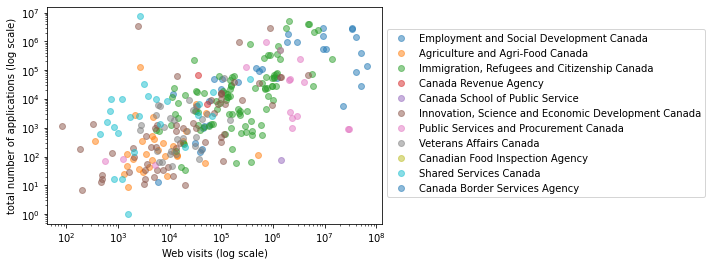

In [95]:
import matplotlib.pyplot as plt

#plot
for dept in departments_web:
    temp_df = df_web[df_web.department_name_en == dept]
    plt.scatter(x = temp_df.web_visits_info_service, y = temp_df.total_applications, label=dept, alpha = 0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Web visits (log scale)')
plt.ylabel('total number of applications (log scale)')
plt.legend(bbox_to_anchor=(1, 0.92))
plt.show()

#### Separating by fiscal year

In [96]:
print('Web visits:')
print('min:', df_web.web_visits_info_service.min(), 'max:', df_web.web_visits_info_service.max(),'\n')
print('Total applications:')
print('min:', df_web.total_applications.min(), 'max:', df_web.total_applications.max())

Web visits:
min: 83.0 max: 65387512.0 

Total applications:
min: 1.0 max: 57653256.0


Plot for fiscal year 2016-2017


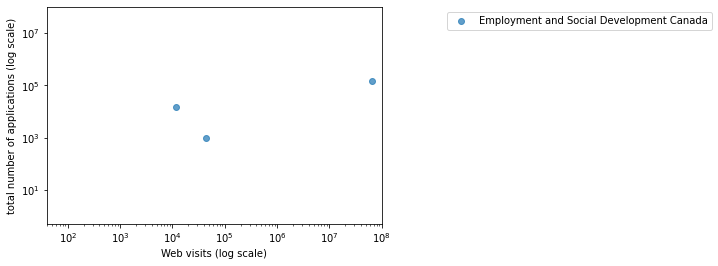

Plot for fiscal year 2017-2018


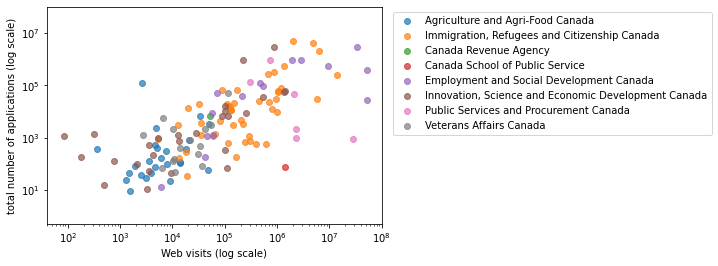

Plot for fiscal year 2018-2019


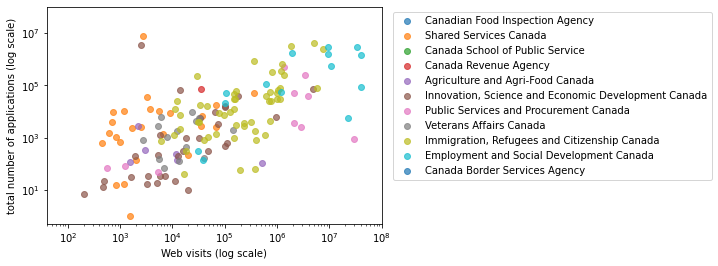

In [97]:
for year in df_web.fiscal_yr.unique():
    print('Plot for fiscal year', year)
    df_web_cur = df_web[df_web.fiscal_yr == year]
    
    #Data is currently available for the following department
    departments_web_cur = df_web_cur.department_name_en.unique()
    
    #Plot
    for dept in departments_web_cur:
        temp_df = df_web_cur[df_web_cur.department_name_en == dept]
        plt.scatter(x = temp_df.web_visits_info_service, y = temp_df.total_applications, label=dept, alpha = 0.7)
    
    #Log scale for visibility
    plt.xscale('log')
    plt.yscale('log')
    
    #Axis range for consistency
    ax = plt.gca()
    ax.set_xlim([40, 10e7])
    ax.set_ylim([0.5, 10e7])
    
    #Axis names
    plt.xlabel('Web visits (log scale)')
    plt.ylabel('total number of applications (log scale)')
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()

### Online applications

In [98]:
#We remove rows with no online applications
df_online = df_web[df_web.online_applications != 0]

#Departments for which we have data are
departments_online = df_online.department_name_en.unique()

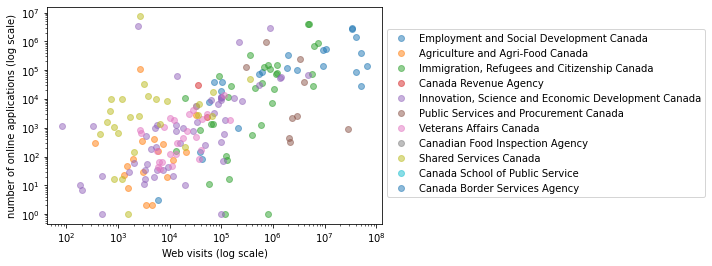

In [99]:
#plot
for dept in departments_online:
    temp_df = df_online[df_online.department_name_en == dept]
    plt.scatter(x = temp_df.web_visits_info_service, y = temp_df.online_applications, label=dept, alpha = 0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Web visits (log scale)')
plt.ylabel('number of online applications (log scale)')
plt.legend(bbox_to_anchor=(1, 0.92))
plt.show()

#### Separating by fiscal year

In [100]:
print('Web visits:')
print('min:', df_online.web_visits_info_service.min(), 'max:', df_online.web_visits_info_service.max(),'\n')
print('Online applications:')
print('min:', df_online.online_applications.min(), 'max:', df_online.online_applications.max())

Web visits:
min: 83.0 max: 65387512.0 

Online applications:
min: 1.0 max: 33920362.0


Plot for fiscal year 2016-2017


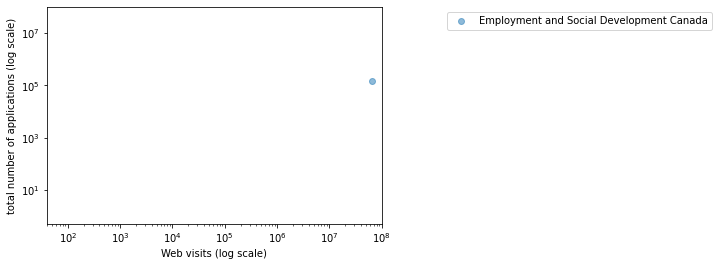

Plot for fiscal year 2017-2018


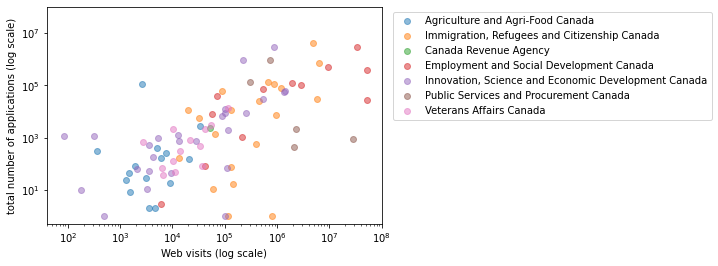

Plot for fiscal year 2018-2019


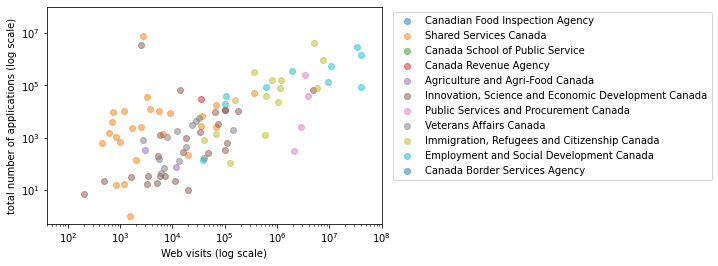

In [101]:
for year in df_online.fiscal_yr.unique():
    print('Plot for fiscal year', year)
    df_online_cur = df_online[df_online.fiscal_yr == year]
    
    #Data is currently available for the following department
    departments_online_cur = df_online_cur.department_name_en.unique()
    
    #Plot
    for dept in departments_online_cur:
        temp_df = df_online_cur[df_online_cur.department_name_en == dept]
        plt.scatter(x = temp_df.web_visits_info_service, y = temp_df.online_applications, label=dept, alpha = 0.5)
    
    #Log scale for visibility
    plt.xscale('log')
    plt.yscale('log')
    
    #Axis range for consistency
    ax = plt.gca()
    ax.set_xlim([40, 10e7])
    ax.set_ylim([0.5, 10e7])
    
    #Names and legend
    plt.xlabel('Web visits (log scale)')
    plt.ylabel('total number of applications (log scale)')
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()

## Calls received and applications

In [102]:
#Selecting important columns
df_calls = df[['fiscal_yr', 'department_name_en', 'calls_received', 'online_applications', 'total_applications']]

#Remove rows where web_visits_info_service or total_applications are null
df_calls = df_calls[(df_calls.calls_received != 0) & (df_calls.total_applications != 0)]

#Head
df_calls.head()

,fiscal_yr,department_name_en,calls_received,online_applications,total_applications
7,2016-2017,Agriculture and Agri-Food Canada,1700.0,2945.0,2945.0
14,2016-2017,Agriculture and Agri-Food Canada,40.0,320.0,320.0
19,2016-2017,Agriculture and Agri-Food Canada,620.0,620.0,725.0
22,2016-2017,Agriculture and Agri-Food Canada,10.0,7256.0,7326.0
50,2016-2017,Canada Border Services Agency,31209.0,0.0,57751821.0


In [103]:
#Remaining departments
departments_calls = df_calls.department_name_en.unique()

### Total applications

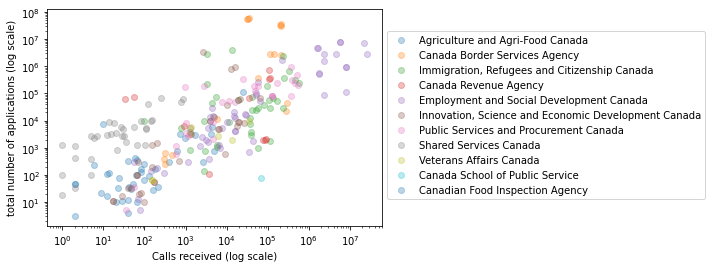

In [104]:
#plot
for dept in departments_calls:
    temp_df = df_calls[df_calls.department_name_en == dept]
    plt.scatter(x = temp_df.calls_received, y = temp_df.total_applications, label=dept, alpha = 0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Calls received (log scale)')
plt.ylabel('total number of applications (log scale)')
plt.legend(bbox_to_anchor=(1, 0.92))
plt.show()

#### Separating by fiscal year

In [105]:
print('Calls received:')
print('min:', df_calls.calls_received.min(), 'max:', df_calls.calls_received.max(),'\n')
print('Total applications:')
print('min:', df_calls.total_applications.min(), 'max:', df_calls.total_applications.max())

Calls received:
min: 1.0 max: 25586963.0 

Total applications:
min: 1.0 max: 58438508.0


Plot for fiscal year 2016-2017


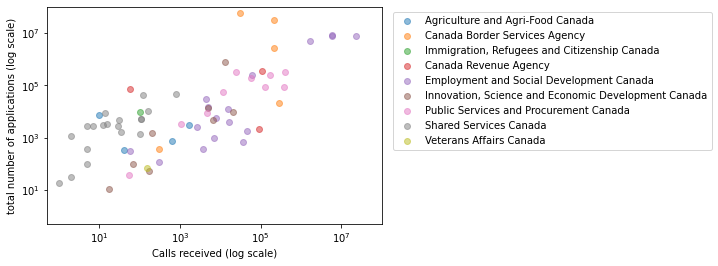

Plot for fiscal year 2017-2018


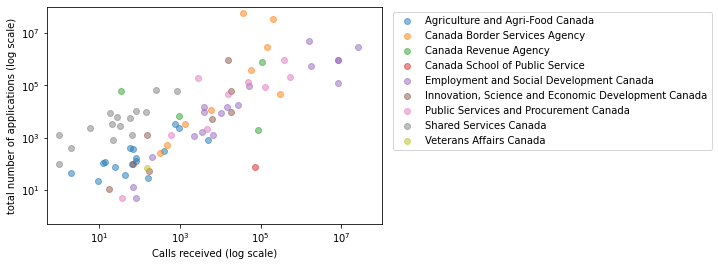

Plot for fiscal year 2018-2019


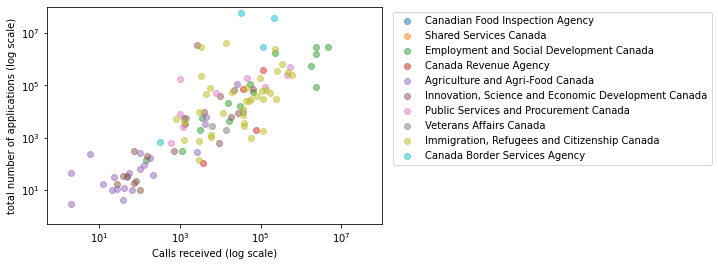

In [106]:
for year in df_calls.fiscal_yr.unique():
    print('Plot for fiscal year', year)
    df_calls_cur = df_calls[df_calls.fiscal_yr == year]
    
    #Data is currently available for the following department
    departments_calls_cur = df_calls_cur.department_name_en.unique()
    
    #Plot
    for dept in departments_calls_cur:
        temp_df = df_calls_cur[df_calls_cur.department_name_en == dept]
        plt.scatter(x = temp_df.calls_received, y = temp_df.total_applications, label=dept, alpha = 0.5)
    
    #Log scale for visibility
    plt.xscale('log')
    plt.yscale('log')
    
    #Axis range for consistency
    ax = plt.gca()
    ax.set_xlim([0.5, 10e7])
    ax.set_ylim([0.5, 10e7])
    
    #Axis names
    plt.xlabel('Calls received (log scale)')
    plt.ylabel('total number of applications (log scale)')
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()

In [107]:
#df_web_gr = df_web.groupby('department_name_en').agg('sum')
#df_web_gr

#df_web_gr.plot()
#plt.xticks(rotation = 90)
#plt.show()

#df_web_gr.plot(kind='scatter',x='web_visits_info_service',y='online_applications')
#plt.show()

# Merge Experiment

Merged all departments together to 

1. show a way to do that with quatitative data and 
2. play arund with plotting multiple bar charts

Inclduing it here just so people can be see. May delete later. 

In [108]:
service_feedf_inv_apps_data = df[['fiscal_yr','department_name_en', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications', 'total_applications']]
df_inv_apps_data.head()

,fiscal_yr,department_name_en,online_applications,in_person_applications,postal_mail_applications,other_applications,total_applications
0,2016-2017,Agriculture and Agri-Food Canada,282.0,0.0,0.0,0.0,282.0
1,2016-2017,Agriculture and Agri-Food Canada,16.0,0.0,0.0,0.0,16.0
2,2016-2017,Agriculture and Agri-Food Canada,141.0,0.0,0.0,0.0,141.0
3,2016-2017,Agriculture and Agri-Food Canada,29.0,0.0,0.0,0.0,29.0
4,2016-2017,Agriculture and Agri-Food Canada,36.0,0.0,0.0,0.0,36.0


In [109]:
#del df_inv_apps_data['department_name_en']

In [110]:
#column_list=['online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications']
#df_inv_apps_data["total_applications"]=df_inv_apps_data[column_list].sum(axis=1)

In [111]:
df_inv_apps_data_merge=df_inv_apps_data.groupby('fiscal_yr').agg(sum)
df_inv_apps_data_merge.head()

,online_applications,in_person_applications,postal_mail_applications,other_applications,total_applications
fiscal_yr,,,,,
2016-2017,478579219.0,125849035.0,74259072.0,5862.0,678693188.0
2017-2018,440649111.0,119139223.0,25571726.0,4870600.0,590230660.0
2018-2019,152912414.0,118033163.0,41274701.0,3977781.0,316198059.0


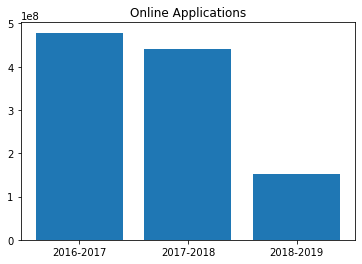

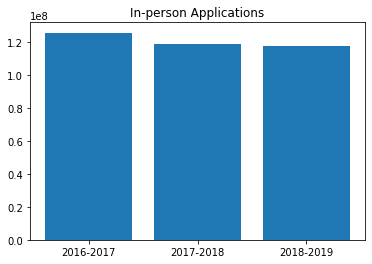

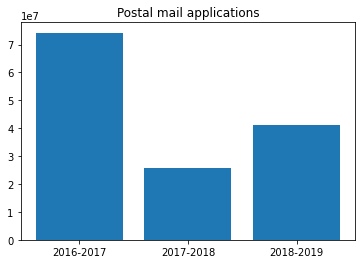

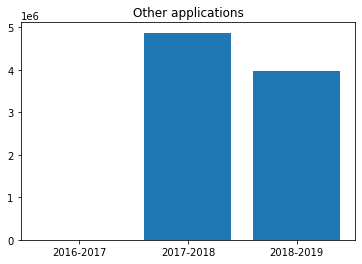

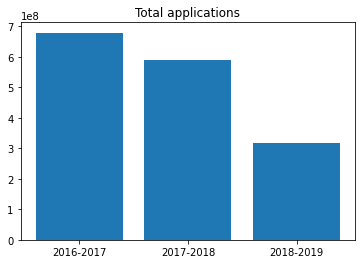

In [112]:
fig1, ax1=plt.subplots()

ax1.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.online_applications, label='online applications')
ax1.set_title("Online Applications")
fig2,ax2=plt.subplots()
ax2.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.in_person_applications)
ax2.set_title('In-person Applications')

fig3, ax3=plt.subplots()
ax3.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.postal_mail_applications)
ax3.set_title("Postal mail applications")

fig4, ax4=plt.subplots()
ax4.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.other_applications)
ax4.set_title("Other applications")

fig5, ax5=plt.subplots()
ax5.bar(df_inv_apps_data_merge.index, df_inv_apps_data_merge.total_applications)
ax5.set_title("Total applications")

plt.show()

## By Fiscal year

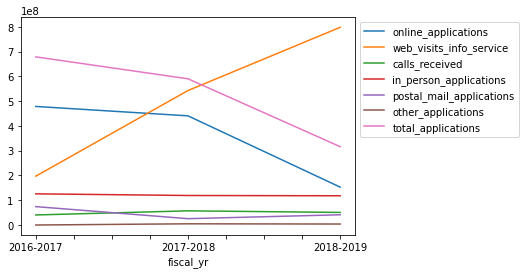

In [113]:
options = ['calls_received', 'online_applications', 'in_person_applications', 'postal_mail_applications', 'other_applications', 'total_applications']

df.groupby('fiscal_yr').sum().plot(label=dept)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## External_Internal

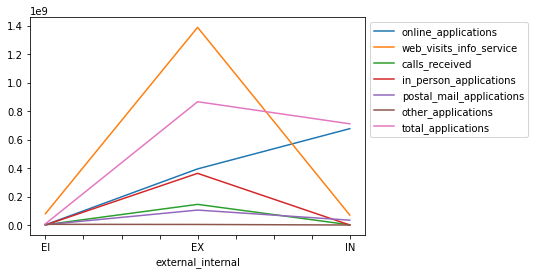

In [114]:
df.groupby('external_internal').sum().plot(label=dept)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Service Fee

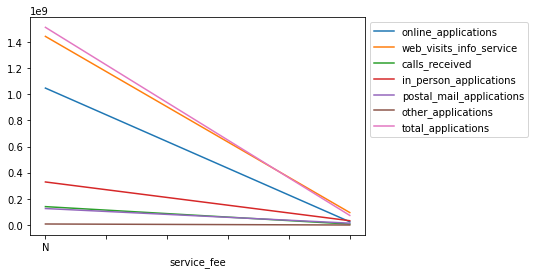

In [115]:
df.groupby('service_fee').sum().plot(label=dept)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Use of Social Insurance Number

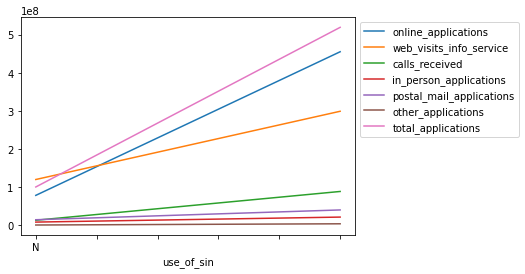

In [116]:
df.groupby('use_of_sin').sum().plot(label=dept)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Decision Tree Regression

In [42]:
# Before converting data, we have to replace some nan columns
columns_to_code = ['external_internal', 'service_fee', 'e_registration', 'e_authentication','e_application', 'e_decision', 'e_issuance', 'e_feedback']
df[columns_to_code].describe()

,external_internal,service_fee,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback
count,1034,1034,654,755,837,830,713,936
unique,3,2,2,2,2,2,2,2
top,EX,N,Y,Y,Y,Y,N,Y
freq,810,736,428,410,458,429,364,606


In [56]:
# Convert categorical data we need to analyze to numerical
for col in columns_to_code:
    df_inv[col + '_code'] = df_inv[col].map({'N' : 0, 'Y' : 1, np.nan : -1})
df_inv.head()

,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,service_description_en,...,special_remarks_en,special_remarks_fr,total_applications,service_fee_code,e_registration_code,e_authentication_code,e_application_code,e_decision_code,e_issuance_code,e_feedback_code
0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",Provides financial counselling and mediation s...,...,"The use of""NA"" in the SIN column is an indica...",NaN,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding for the development of nation...,...,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides funding to industry associations and ...,...,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides support for pre-commercialization Res...,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,Provides repayable contributions to approved i...,...,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data to fit
X = df_inv_16_17[columns_to_code]
y = df_inv_16_17.total_applications

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=15)
tree_model.fit(X, y)

In [ ]:
print("Data")
print(X)
print(y)
print("Predictions")
print(tree_model.predict(X.head()))